# Trabalho Prático - Cálculo Numérico (SME0104)

Este notebook contém a resolução completa do trabalho prático da disciplina de Cálculo Numérico (SME0104), ministrada pela professora Cynthia Lage Ferreira, conforme as orientações fornecidas.

Todas as questões foram resolvidas em Python, com ênfase na implementação dos métodos numéricos abordados em aula, análise teórica e validação dos resultados obtidos.

**Autores**:  
Luiz Felipe Diniz Costa - 13782032  
Pedro Lucas Figueiredo Bahiense - 14675458

> **Observação**  
> O Trabalho incluirá um resumo teórico para cada questão, conforme sugerido pela professora.

# Importações


In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d   

# Questão 1: Sistemas Lineares

Discuta, detalhadamente, as diferenças entre as funções `func1` e `func2` apresentadas abaixo. Comente os códigos, os resultados obtidos e apresente as suas conclusões a partir da aplicação destas duas funções no exemplo abaixo.


## 2.1 Revisão de sistemas lineares, Gauss e Fatoração LU

Antes de começarmos a resolver as questões de fato, precimamos entender os tópicos que ela aborda. Um sistema linear com $m$ equações e $n$ variáveis é escrito como:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n &= b_1\\
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n &= b_2\\
&\vdots\\
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n &= b_m
\end{aligned}
$$

* $a_{ij}$ são os coeficientes  
* $x_j$ são as incógnitas  
* $b_i$ são os termos independentes

De forma matricial, definimos

$$
A = [a_{ij}]_{m\times n},\quad
x = \begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix},\quad
b = \begin{bmatrix}b_1\\\vdots\\b_m\end{bmatrix},
$$

e escrevemos

$$
A\,x = b.
$$

Para simplificar a aplicação de métodos de eliminação, utilizamos a **matriz aumentada**:

$$
[A \mid b] =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} & \mid & b_1\\
a_{21} & a_{22} & \dots & a_{2n} & \mid & b_2\\
\vdots & \vdots & \ddots & \vdots & \mid & \vdots\\ 
a_{m1} & a_{m2} & \dots & a_{mn} & \mid & b_m
\end{bmatrix}.
$$


### 2.1.1 Possíveis soluções de um sistema linear

1. **Solução única**  
   O sistema admite exatamente uma solução.

2. **Infinitas soluções**  
   Existem várias combinações $(x_1,\dots,x_n)$ que satisfazem todas as equações.

3. **Sem solução**  
   Não há nenhum vetor $x$ que torne todas as equações verdadeiras.

**Critério pelo determinante**

* Se $\det(A)\neq 0$, então o sistema tem solução única.  
* Se $\det(A)=0$, pode ter infinitas soluções ou nenhuma solução.


#### 2.1.1.1 Retas concorrentes (solução única)

Duas retas no plano $\mathbb{R}^2$ que se interceptam em um único ponto correspondem a um sistema de duas equações lineares com solução única. O ponto de interseção $(x_1, x_2)$ é exatamente a solução do sistema.


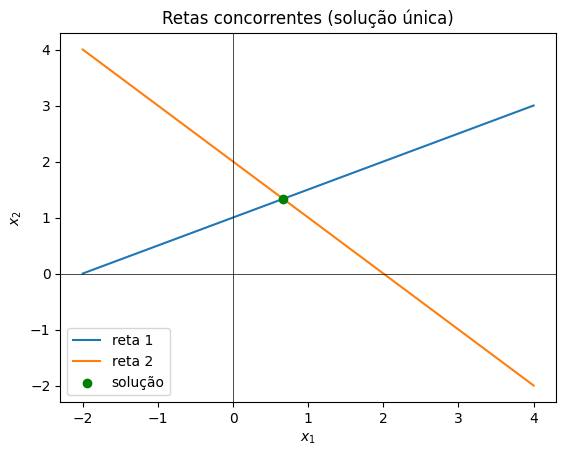

In [11]:
# coeficientes das retas
m1, b1 = 0.5, 1    # reta 1: x2 = 0.5*x1 + 1
m2, b2 = -1, 2     # reta 2: x2 = -1*x1 + 2

# domínio para plotar as retas
x = np.linspace(-2, 4, 400)
y1 = m1 * x + b1
y2 = m2 * x + b2

# calcular ponto de interseção
# m1*x + b1 = m2*x + b2  ->  x = (b2 - b1) / (m1 - m2)
xi = (b2 - b1) / (m1 - m2)
yi = m1 * xi + b1

plt.figure()
plt.plot(x, y1, label='reta 1')
plt.plot(x, y2, label='reta 2')
plt.scatter([xi], [yi], color='green', label='solução', zorder=5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas concorrentes (solução única)')
plt.show()

#### 2.1.1.2 Retas coincidentes (infinitas soluções)

Quando duas equações representam exatamente a mesma reta, todo ponto que pertence a essa reta satisfaz o sistema. Isso gera infinitas soluções, pois há um grau de liberdade (qualquer $(x_1,x_2)$ na reta funciona).


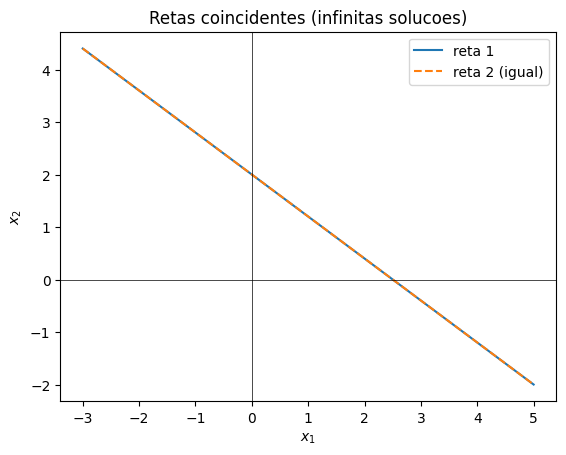

In [12]:
# definindo coeficientes iguais para coincidir
m, b = -0.8, 2    # x2 = -0.8*x1 + 2

x = np.linspace(-3, 5, 400)
y = m * x + b

plt.figure()
plt.plot(x, y, label='reta 1')
plt.plot(x, y, linestyle='--', label='reta 2 (igual)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas coincidentes (infinitas solucoes)')
plt.show()

#### 2.1.1.3 Retas paralelas (sem solução)

Duas retas no plano que possuem o mesmo coeficiente angular mas interceptações diferentes nunca se encontram, logo o sistema associado não possui solução.

Sejam as linhas:

$$
x_2 = m\,x_1 + b_1
\quad\text{e}\quad
x_2 = m\,x_1 + b_2
$$

com $m$ idêntico, mas $b_1 \neq b_2$. Como não há nenhum $(x_1,x_2)$ que satisfaça simultaneamente ambas as equações, o sistema é impossível.


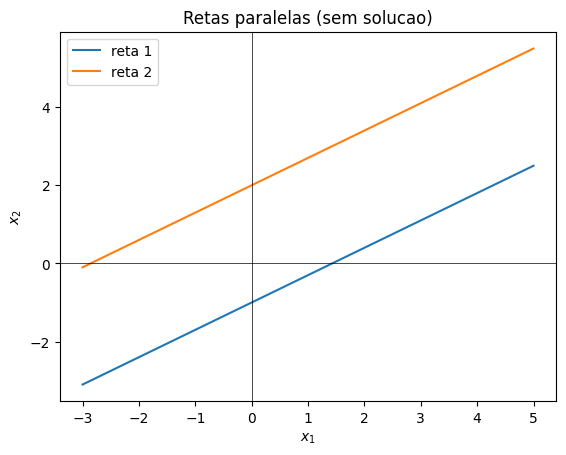

In [13]:
# mesmo coeficiente angular, interceptações diferentes
m = 0.7
b1, b2 = -1, 2   # b1 != b2

x = np.linspace(-3, 5, 400)
y1 = m * x + b1
y2 = m * x + b2

plt.figure()
plt.plot(x, y1, label='reta 1')
plt.plot(x, y2, label='reta 2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas paralelas (sem solucao)')
plt.show()

### 2.1.2 Determinantes de matrizes triangulares

Uma **matriz triangular** é aquela que tem todos os elementos acima ou abaixo da diagonal principal iguais a zero:

* **Triangular superior**: zeros abaixo da diagonal

  $$
  \begin{bmatrix}
  1 & 4 & 5\\
  0 & 2 & 6\\
  0 & 0 & 3
  \end{bmatrix}
  $$

* **Triangular inferior**: zeros acima da diagonal

  $$
  \begin{bmatrix}
  1 & 0 & 0\\
  4 & 2 & 0\\
  5 & 6 & 3
  \end{bmatrix}
  $$

#### 2.1.2.1 Propriedade do determinante

Para qualquer matriz triangular $T\in\mathbb{R}^{n\times n}$, vale que

$$
\det(T) = \prod_{i=1}^{n} T_{ii},
$$

ou seja, basta multiplicar os elementos da diagonal principal.


### 2.1.3 Métodos de solução de sistemas

**Métodos diretos**

* Geram a solução exata de um sistema quadrado $n\times n$ em um número finito de operações.
* Exemplo clássico: eliminação de Gauss.

**Métodos iterativos**

* Partem de um chute inicial $\,x^{(0)}$ e produzem uma sequência $\{x^{(k)}\}$.
* Sob certas condições, essa sequência converge para a solução real do sistema.
* São úteis quando a matriz é muito grande ou esparsa e métodos diretos ficam caros.


Agora vamos detalhar o método direto da Eliminação de Gauss, que será a ferramenta que utilizaremos nesse exercício.

### 2.1.4 Eliminação de Gauss

A eliminação de Gauss é um **método direto** que transforma o sistema matricial original em outro sistema equivalente, porém de solução simples (triangular). As soluções finais permanecem as mesmas.

#### 2.1.4.1 Operações elementares sobre linhas

1. **Troca de linhas**  
   $L_i \leftrightarrow L_j$  
   Permuta a posição das equações $i$ e $j$.

2. **Escalonamento de linha**  
   $L_i \leftarrow k\cdot L_i,\quad k \neq 0$  
   Multiplica todos os elementos da linha $i$ por um escalar não nulo.

3. **Substituição linear**  
   $L_i \leftarrow L_i + k\cdot L_j,\quad i\neq j$  
   Soma à linha $i$ um múltiplo da linha $j$.

4. **Descartar linha nula**  
   Se uma linha ficar com todos os elementos iguais a zero, ela não contribui para o sistema e pode ser removida.

Aplicando repetidamente essas operações na **matriz aumentada** $[A\mid b]$, chegamos a uma forma triangular superior, de onde obtemos facilmente cada incógnita por substituição regressiva.


#### 2.1.4.2 Passo a passo

Definimos **pivô** como o primeiro elemento não nulo de cada linha da matriz aumentada $[A\mid b]$.

**Fase 1 - eliminação**

1. Monte a matriz aumentada do sistema.  
2. Para a 1ª linha:  
   * Identifique o pivô (primeiro elemento não zero).  
   * Use operações elementares para zerar todos os elementos abaixo desse pivô.  
3. Para a 2ª linha:  
   * Localize o pivô (na 2ª coluna agora).  
   * Zere todos os elementos abaixo.  
4. Repita para cada linha subsequente até obter forma triangular superior.

**Fase 2 - retro­substituição**

1. A partir da última linha (única incógnita não nula), calculamos esse valor de $x_n$.  
2. Substitua $x_n$ na penúltima linha para obter $x_{n-1}$.  
3. Prossiga de baixo para cima até encontrar todas as variáveis $\{x_1,\dots,x_n\}$.


### 2.1.5 Fatoração LU

A fatoração LU é um método direto que reescreve a matriz $A$ como produto de duas matrizes triangulares:

- $L$: matriz triangular inferior, com 1 na diagonal principal  
- $U$: matriz triangular superior  

Ou seja, buscamos  
$$
A = L\,U.
$$

Para construir $L$ e $U$, aplicamos as mesmas operações da eliminação de Gauss. Considere um sistema genérico $3\times3$:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 &= b_1,\\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 &= b_2,\\
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 &= b_3,
\end{aligned}
\quad
A = 
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}.
$$

1. Na etapa de eliminação de Gauss, calculamos multiplicadores para zerar os elementos abaixo da diagonal:
   $$
   m_{21} = \frac{a_{21}}{a_{11}},\quad
   m_{31} = \frac{a_{31}}{a_{11}}.
   $$
2. Esses valores tornam-se $L_{21}$ e $L_{31}$, respectivamente.  
3. Após aplicar as operações, obtemos a matriz triangular superior
   $$
   U = 
   \begin{bmatrix}
   u_{11} & u_{12} & u_{13}\\
   0      & u_{22} & u_{23}\\
   0      & 0      & u_{33}
   \end{bmatrix}.
   $$
4. Repetindo o processo na segunda coluna (para zerar abaixo de $u_{22}$), calculamos
   $$
   m_{32} = \frac{u_{32}}{u_{22}},
   $$
   que se torna $L_{32}$.

Ao final, temos

$$
L = 
\begin{bmatrix}
1      & 0      & 0\\
m_{21} & 1      & 0\\
m_{31} & m_{32} & 1
\end{bmatrix},
\quad
U = 
\begin{bmatrix}
u_{11} & u_{12} & u_{13}\\
0      & u_{22} & u_{23}\\
0      & 0      & u_{33}
\end{bmatrix},
$$

de modo que  
$$
A = L\,U.
$$

Na questão 1 usamos a fatoração LU para resolver o mesmo sistema $A x = b$ com diferentes vetores $b$, aproveitando que uma única decomposição $A = L\,U$ nos permite resolver cada caso via dois sistemas triangulares (primeiro $L\,y = b$, depois $U\,x = y$).

## 2.2 Entendendo o problema da Questão 1

Para começar a Questão 1, precisamos entender que o objetivo é comparar duas formas de fazer a decomposição LU de uma mesma matriz em Python. A função `func1` implementa a versão clássica da eliminação de Gauss, trabalhando sobre toda a matriz, enquanto `func2` restringe o cálculo a uma faixa de largura `p` ao redor da diagonal, o que reduz o número de operações para matrizes com banda estreita. 

No exemplo proposto, geramos uma matriz quadrada $A$ de tamanho $n \times n$, em que só há valores diferentes de zero dentro dessa banda de largura $p$. Em seguida, medimos quanto tempo cada função leva para produzir $L$ e $U$ e calculamos o erro de reconstrução $\lVert LU - A \rVert$ para verificar se ambas chegam ao mesmo resultado com precisão. 

Com isso em mente, podemos ir para a próxima parte.


### 2.2.1 Padrão de fill-in e estrutura de banda

Em matrizes banda-estreita de largura $p$, a fatoração LU via eliminação restrita não gera `fill-in` fora da banda original. Ou seja, tanto $L$ quanto $U$ mantêm o mesmo perfil esparso de largura $p$, diferentemente da fatoração completa, em que o `fill-in` pode se espalhar por toda a matriz triangular.

Por exemplo, suponha $n = 7$ e $p = 1$. A matriz $A$ tem não-zeros apenas em $(i,i-1)$, $(i,i)$ e $(i,i+1)$:

$$
A =
\begin{bmatrix}
a_{11} & a_{12} & 0      & 0      & 0      & 0      & 0      \\
a_{21} & a_{22} & a_{23} & 0      & 0      & 0      & 0      \\
0      & a_{32} & a_{33} & a_{34} & 0      & 0      & 0      \\
0      & 0      & a_{43} & a_{44} & a_{45} & 0      & 0      \\
0      & 0      & 0      & a_{54} & a_{55} & a_{56} & 0      \\
0      & 0      & 0      & 0      & a_{65} & a_{66} & a_{67} \\
0      & 0      & 0      & 0      & 0      & a_{76} & a_{77}
\end{bmatrix}.
$$

Após aplicar `func2` com faixa $p = 1$, as fatorações $L$ e $U$ preservam o mesmo padrão de banda:

$$
L =
\begin{bmatrix}
1         & 0          & 0          & 0          & 0          & 0          & 0         \\
\ell_{21} & 1          & 0          & 0          & 0          & 0          & 0         \\
0         & \ell_{32}  & 1          & 0          & 0          & 0          & 0         \\
0         & 0          & \ell_{43}  & 1          & 0          & 0          & 0         \\
0         & 0          & 0          & \ell_{54}  & 1          & 0          & 0         \\
0         & 0          & 0          & 0          & \ell_{65}  & 1          & 0         \\
0         & 0          & 0          & 0          & 0          & \ell_{76}  & 1
\end{bmatrix},
\quad
U =
\begin{bmatrix}
u_{11}    & u_{12}     & 0          & 0          & 0          & 0          & 0         \\
0         & u_{22}     & u_{23}     & 0          & 0          & 0          & 0         \\
0         & 0          & u_{33}     & u_{34}     & 0          & 0          & 0         \\
0         & 0          & 0          & u_{44}     & u_{45}     & 0          & 0         \\
0         & 0          & 0          & 0          & u_{55}     & u_{56}     & 0         \\
0         & 0          & 0          & 0          & 0          & u_{66}     & u_{67}    \\
0         & 0          & 0          & 0          & 0          & 0          & u_{77}
\end{bmatrix}.
$$

Em contraste, na decomposição completa de `func1` os multiplicadores podem gerar não-zeros em posições fora da banda originalmente não nula, aumentando o custo de memória e de operações computacionais.


### 2.2.2 Estabilidade numérica e pivotamento

Como vimos na seção de **Fatoração LU**, a construção de $L$ e $U$ parte das mesmas operações da eliminação de Gauss, usando o pivô $a_{jj}$ para zerar elementos abaixo da diagonal. No entanto, se o pivô escolhido for muito pequeno ou igual a zero, podem ocorrer:

- **Instabilidade numérica**: erros de arredondamento crescem devido ao fator de crescimento da matriz.  
- **Divisão por zero**: quando $a_{jj}=0$, o cálculo de $L_{ij} = U_{ij}/U_{jj}$ torna-se indefinido.

Para contornar isso, introdizimos o **pivotamento parcial**, que consiste em trocar a linha $j$ com outra linha $k\ge j$ que maximize $|U_{k,j}|$. Dessa forma, garantimos um pivô de magnitude maior, reduzindo erros de arredondamento.

Em matrizes densas, o pivotamento parcial global é padrão; já em matrizes banda-estreita, podemos optar por:

- **Pivotamento restrito ao perfil**: só permitimos trocas de linha dentro da faixa de largura $p$, para não gerar `fill-in` fora da banda original.  
- **Pivotamento global**: busca maior estabilidade, mas pode comprometer a esparsidade.


### 2.2.3 Definindo `func1`

Ela faz a decomposição LU completa usando eliminação de Gauss.

In [2]:
def func1(A):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)

    for j in range(n - 1):
        for i in range(j + 1, n):
            L[i, j] = U[i, j] / U[j, j]
            U[i, j:n] = U[i, j:n] - L[i, j] * U[j, j:n]

    return L, U

* `n = A.shape[0]` obtém a dimensão $n$ de $A$.  
* `U = A.copy()` faz cópia de `A` em `U`, evitando alterar o original.  
* `L = np.eye(n)` inicializa `L` como matriz identidade $n\times n$.  
* O loop duplo percorre colunas `j` e linhas $i = j+1, \dots, n-1$.  
* Em cada iteração, computa o multiplicador $L_{ij}$ e atualiza a linha $i$ de `U`.  
* Ao final, retorna `L` (triangular inferior) e `U` (triangular superior).  
* **Objetivo matemático**: encontrar $L$ e $U$ tais que  
  $$
    A = L\,U,\quad
    L\text{ triangular inferior com diagonal unitária},\quad
    U\text{ triangular superior}
  $$
* **Garantia de triangularidade**: após o processo, todos os elementos abaixo da diagonal de $U$ são zero, e $L$ contém apenas os multiplicadores, com diagonal unitária.  
* **Tratamento de pivô nulo**: se em qualquer iteração $U_{jj} = 0$, lança `ZeroDivisionError`; requer que todos os menores principais sejam não nulos (sem pivotamento).  
* **Complexidade em flops**:  
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^n (n - j)
    \;\approx\; \tfrac{2}{3}\,n^3
    \quad\text{flops}
  $$
  o que equivale a $\mathcal{O}(n^3)$.


### 2.2.4 Definindo `func2`

A seguir, vemos `func2`, que é quase igual a `func1` mas limita o alcance das colunas a `j + p`, reduzindo o custo para matrizes em banda.


In [3]:
def func2(A, p):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)

    for j in range(n - 1):
        v = min(n, j + p + 1)
        for i in range(j + 1, v):
            L[i, j] = U[i, j] / U[j, j]
            U[i, j:v] = U[i, j:v] - L[i, j] * U[j, j:v]

    return L, U

* A diferença está em $v = \min(n,\,j + p + 1)$, que define até onde atualizar.  
* O laço interno processa apenas $i = j+1, \dots, v-1$, ignorando entradas fora da banda de semi-largura $p$.  
* **Objetivo matemático**: fazer a decomposição $A = L\,U$ limitando as atualizações a uma banda de semi-largura $p$.  
* **Garantia de triangularidade e banda**:  
  * $L$ permanece triangular inferior com diagonal unitária e largura de banda $p$.  
  * $U$ permanece triangular superior, mantendo no máximo $p$ diagonais acima da principal.  
* **Tratamento de pivô nulo**: se $U_{jj} = 0$ dentro da banda, lança `ZeroDivisionError` e exige que todos os menores principais sejam não nulos.  
* **Complexidade em flops**:  
  $$
    \sum_{j=1}^{n-1}(2p^2 + p)
    = (2p^2 + p)(n-1)
    \approx 2\,n\,p^2 + n\,p
    \quad\text{flops}
  $$
  o que equivale a $\mathcal{O}(n\,p^2)$.


### 2.2.5 Comparação entre `func1` e `func2`

**func1 (eliminação de Gauss completa)**

- Para cada coluna $j = 1,\dots,n-1$, processa todas as linhas $i = j+1,\dots,n$.  
- Atualizações:
  $$
    L_{ij} = \frac{U_{ij}}{U_{jj}},\quad
    U_{i,j:n} \;=\; U_{i,j:n} - L_{ij}\,U_{j,j:n}
  $$
- Complexidade:
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^{n}(n-j)
    = \sum_{j=1}^{n-1}(n-j)^2
    = \mathcal{O}(n^3)
  $$

**func2 (eliminação restrita à banda de largura $p$)**

- Para cada coluna $j = 1,\dots,n-1$:
  1. Define $v = \min(n,\;j + p + 1)$.  
  2. Processa apenas as linhas $i = j+1,\dots,v-1$.  
- Atualizações:
  $$
    L_{ij} = \frac{U_{ij}}{U_{jj}},\quad
    U_{i,j:v} \;=\; U_{i,j:v} - L_{ij}\,U_{j,j:v}
  $$
- Complexidade:
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^{\min(n,j+p)}p
    = \mathcal{O}(n\,p^2)
  $$
- Observações:
  - Se $p\ll n$ e $p$ for constante, a complexidade efetiva cai para $\mathcal{O}(n)$.  
  - O padrão de *fill-in* permanece dentro da banda, sem gerar não-nulos fora dela.


#### 2.2.5.1 Testando e comparando as funções

In [ ]:
n = 2000
p = 2

# geração da matriz banda
A = np.zeros((n, n))

# preenche A com valores aleatórios normais apenas na banda de largura 2 (p = 2)
for i in range(n):
    for j in range(max(0, i - p), min(n, i + p + 1)):
        A[i, j] = np.random.normal()

# mede o tempo de execução da função func1 (LU completa)
start_time = time.time()
(L, U) = func1(A)
end_time = time.time()
print(end_time - start_time)

# mede o tempo de execução da função func2 (LU com banda p)
start_time = time.time()
(L_, U_) = func2(A, p)
end_time = time.time()
print(end_time - start_time)

# calcula o erro da LU clássica
print(np.linalg.norm(L @ U - A))

# calcula o erro da LU com banda
print(np.linalg.norm(L_ @ U_ - A))


11.407634735107422
0.0218961238861084
8.456072798910327e-12
8.456072798910327e-12


### 2.2.6 Vantagens e limitações de `func2`

**Vantagens de `func2`:**
- reduz muito o número de operações de cálculo de $\mathcal{O}(n^3)$ para $\mathcal{O}(n\,p^2)$ quando $p \ll n$  
- preserva a esparsidade da matriz, economizando memória e acessos a cache. Como demonstrado em *Padrão de fill-in*, a banda original de largura $p$ é mantida em $L$ e $U$, evitando novos não-zeros  
- mantém a mesma precisão numérica de `func1`, com erros da ordem de $10^{-12}$

**Limitações de `func2`:**
- para matrizes densas (quando $p \approx n$) a economia de operações desaparece e o overhead de $\min()$ pode até penalizar o desempenho  
- sem pivotamento adequado, ainda sofre dos mesmos riscos de instabilidade numérica de `func1`  
- depende do perfil de banda estar bem definido → matrizes com padrões de sparsidade diferentes não ganham vantagem.


### 2.2.7 Conclusão da Questão 1

Pelos testes que rodamos (tempo e erro), dá pra concluir o seguinte:

- **Tempo da `func1`**: ficou em torno de $11{,}41\ \text{s}$, conforme a complexidade $\mathcal{O}(n^3)$ da eliminação de Gauss completa.  
- **Tempo da `func2`**: deu cerca de $0{,}022\ \text{s}$, de acordo com a complexidade $\mathcal{O}(n\,p^2)$ da eliminação restrita à banda (conforme Seção “Complexidade algorítmica”).  
- **Erro da reconstrução** ($\lVert L \cdot U - A\rVert$): da ordem de $10^{-12}$ em ambos os casos, mostrando comportamento numérico equivalente (conforme Seção “Estabilidade numérica e pivotamento”).  

- **Ganho de eficiência**: quando $p \ll n$, a economia de operações é muito grande — passa de cúbico para quase linear em $n$, pois  
  $$
    \frac{\mathcal{O}(n^3)}{\mathcal{O}(n\,p^2)} = \mathcal{O}\bigl(\tfrac{n^2}{p^2}\bigr)\gg 1.
  $$  
- **Padrão de fill-in**: `func2` preserva o perfil esparso de largura $p$, exigindo menos memória e acessos à cache (conforme Seção “Padrão de fill-in e estrutura de banda”).  
- **Escolha do método**: ambos têm comportamento numérico similar, mas usamos a `func1` se precisarmos de pivotamento global ou lidar com matrizes densas, pois só ela permite trocar pivôs em qualquer posição sem restringir o perfil de banda (conforme Seção “Estabilidade numérica e pivotamento”).


# 5 Questão 4: Interpolação

Para a função

$$
f(t) = \frac{1}{1 + 25t^2}
$$

no intervalo $[-1, 1]$, faça:


a)  Implemente as interpolações de Lagrange e de Newton.

b) Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e Newton com o código implementado no item anterior.  Mostre os resultados em dois gráficos separados. Que resultado teórico justifica o fato das duas soluções serem iguais?

c) Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.

d) Usando a função `scipy.interpolate.interp1d`, calcule a interpolação usando *spline* linear e cúbica, considerando 21 pontos igualmente espaçados. Exiba os gráficos e comente as diferenças das soluções deste item para os anteriores.

e) Repita os itens b) e c) com nós de Chebyshev. Comente os resultados obtidos. Por que este resultado é melhor do que os resultados obtidos nos itens b) e c)?

## Interpolação por Sistema Linear

**Antes de começarmos a resolver as questões de fato, precimamos entender os tópicos que ela aborda.**

Este é o primeiro método de interpolação polinomial que veremos, servindo de base para as formas de Lagrange, Newton e para as análises de erro que virão em seguida. Aqui, buscamos um polinômio

$$
p_n(x) = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n
$$

que satisfaça

$$
p_n(x_i) = f(x_i)\quad\text{para }i=0,\dots,n.
$$

### 1. Formulação como sistema linear

Para $n+1$ nós $\{(x_i,f(x_i))\}$, impomos

$$
\begin{cases}
a_0 + a_1x_0 + a_2x_0^2 + \cdots + a_nx_0^n = f(x_0),\\
a_0 + a_1x_1 + a_2x_1^2 + \cdots + a_nx_1^n = f(x_1),\\
\quad\vdots\\
a_0 + a_1x_n + a_2x_n^2 + \cdots + a_nx_n^n = f(x_n).
\end{cases}
$$

Em forma matricial, temos o sistema

$$
\underbrace{
\begin{bmatrix}
1 & x_0   & x_0^2   & \cdots & x_0^n\\
1 & x_1   & x_1^2   & \cdots & x_1^n\\
\vdots  & \vdots & \vdots  & \ddots & \vdots\\
1 & x_n   & x_n^2   & \cdots & x_n^n
\end{bmatrix}
}_{\text{matriz de Vandermonde}}
\!
\begin{bmatrix}a_0\\a_1\\\vdots\\a_n\end{bmatrix}
=
\begin{bmatrix}f(x_0)\\f(x_1)\\\vdots\\f(x_n)\end{bmatrix}.
$$

### 2. Exemplo numérico

Suponha os pontos

$$
\{(-1,4),\,(0,1),\,(2,3)\},
$$

logo $n=2$ e

$$
p_2(x) = a_0 + a_1x + a_2x^2.
$$

O sistema é

$$
\begin{bmatrix}
1 & -1 & 1\\
1 &  0 & 0\\
1 &  2 & 4
\end{bmatrix}
\begin{bmatrix}a_0\\a_1\\a_2\end{bmatrix}
=
\begin{bmatrix}4\\1\\3\end{bmatrix}.
$$

Da segunda equação já vem $a_0=1$. Substituindo nas demais e resolvendo:

1. $1 - a_1 + a_2 = 4$
2. $1 + 2a_1 + 4a_2 = 3$

Desses, obtemos

$$
a_2 = \tfrac{4}{3},\quad
a_1 = -\tfrac{5}{3}.
$$

Portanto,

$$
\boxed{p_2(x) = 1 - \tfrac{5}{3}\,x + \tfrac{4}{3}\,x^2.}
$$

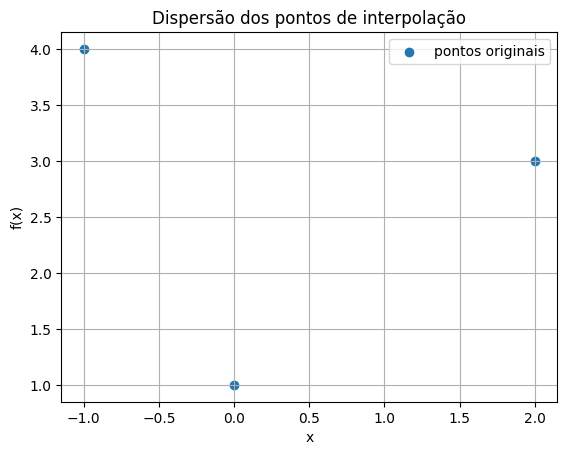

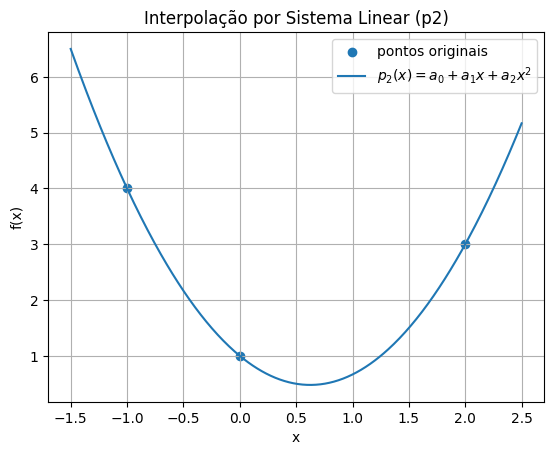

In [18]:
# define os pontos de interpolação
xi = np.array([-1, 0, 2], dtype=float)
fi = np.array([4, 1, 3], dtype=float)

# monta a matriz do sistema (Vandermonde)
A = np.column_stack([xi**0, xi, xi**2])  # colunas: [1, x, x^2]

# resolve para encontrar os coeficientes [a0, a1, a2]
a0, a1, a2 = np.linalg.solve(A, fi)

# define a função do polinômio interpolador p2(x)
def p2(x):
    return a0 + a1*x + a2*x**2

# gera pontos para o gráfico do polinômio
xx = np.linspace(xi.min() - 0.5, xi.max() + 0.5, 400)
yy = p2(xx)

# gráfico 1: dispersão dos pontos originais
plt.figure()
plt.scatter(xi, fi, marker='o', label='pontos originais')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Dispersão dos pontos de interpolação')
plt.legend()
plt.grid(True)

# gráfico 2: polinômio p2(x) sobreposto aos pontos
plt.figure()
plt.scatter(xi, fi, marker='o', label='pontos originais')
plt.plot(xx, yy, label=r'$p_2(x) = a_0 + a_1 x + a_2 x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolação por Sistema Linear (p2)')
plt.legend()
plt.grid(True)

plt.show()

## Polinômios Interpoladores de Lagrange

Após formularmos a interpolação por sistema linear (matriz de Vandermonde), é comum recorrer à forma de Lagrange quando queremos, sem resolver sistemas potencialmente mal condicionados, um polinômio que passe exatamente pelos nós dados.

### 1. Motivação

* Sistemas de Vandermonde com valores muito próximos podem ser instáveis

  $$
    \begin{bmatrix}
      1 & 0.001 & 0.002\\
      1 & 0.003 & 0.005\\
      1 & 0.007 & 0.007
    \end{bmatrix}
  $$

  exigem cuidado numérico.
* A forma de Lagrange constrói o mesmo polinômio $p_n(x)$ sem montar nem inverter essa matriz.


### 2. Definição dos polinômios base $L_k(x)$

Queremos um polinômio $p_n(x)$ de grau $n$ que satisfaça $p_n(x_i)=y_i$, onde $y_i=f(x_i)$. Para isso, definimos

$$
L_k(x) = \prod_{\substack{j=0 \\ j\neq k}}^{n}
\frac{x - x_j}{x_k - x_j},
$$

que garante

$$
L_k(x_i)=
\begin{cases}
1,& i=k,\\
0,& i\neq k.
\end{cases}
$$

Então

$$
\boxed{p_n(x)=\sum_{k=0}^{n}y_k\,L_k(x).}
$$

### 3. Exemplo numérico (com destaque ao polinômio)

Dados os pontos

$$
(x_0,y_0)=(-1,6),\quad
(x_1,y_1)=(0,1),\quad
(x_2,y_2)=(2,0).
$$

Temos

$$
p_2(x)=6\,L_0(x)+1\,L_1(x)+0\,L_2(x).
$$

Calculamos cada base:

$$
\begin{aligned}
L_0(x)
&=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}
=\frac{x(x-2)}{(-1)(-3)}
=\frac{x(x-2)}{3},\\[6pt]
L_1(x)
&=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}
=\frac{(x+1)(x-2)}{1\cdot(-2)}
=-\frac{(x+1)(x-2)}{2},\\[6pt]
L_2(x)
&=\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
=\frac{x(x+1)}{3\cdot2}
=\frac{x(x+1)}{6}.
\end{aligned}
$$

Substituindo:

$$
\begin{aligned}
p_2(x)
&=6\cdot\frac{x(x-2)}{3}
\;+\;1\cdot\Bigl(-\tfrac{(x+1)(x-2)}{2}\Bigr)
\;+\;0\cdot\frac{x(x+1)}{6}\\[4pt]
&=2x(x-2)\;-\;\frac{(x+1)(x-2)}{2}\\[4pt]
&=\frac{3}{2}\,x^2-\frac{7}{2}\,x+1.
\end{aligned}
$$

**Portanto, o polinômio interpolador final é**

$$
\boxed{p_2(x) = \frac{3}{2}\,x^2 - \frac{7}{2}\,x + 1.}
$$


### 4. Algoritmo de avaliação direta

Para avaliar $p_n$ num ponto $\bar x$ sem montar o polinômio completo:

1. **Entradas**
   $\{x_i\}_{i=0}^n$, $\{y_i\}_{i=0}^n$, ponto $\bar x$.
2. **Cálculo**

   $$
   p_n(\bar x)
   = \sum_{i=0}^n y_i
     \prod_{\substack{j=0\\j\neq i}}^n
       \frac{\bar x - x_j}{x_i - x_j}.
   $$
3. **Pseudocódigo**

   ```text
   result ← 0
   for i from 0 to n:
     term ← y[i]
     for j from 0 to n:
       if j≠i:
         term ← term * ((x_eval - x[j]) / (x[i] - x[j]))
     result ← result + term
   return result
   ```

Esse método é direto, evita sistemas lineares e mantém coesão com a sequência de interpolação polinomial.

## Interpolação de Newton

A forma de Newton integra naturalmente o que vimos sobre sistemas lineares e os polinômios de Lagrange, oferecendo um método incremental para construir o interpolador à medida que adicionamos nós.

### 1. Forma do polinômio

Para $n+1$ nós $\{(x_i,f(x_i))\}_{i=0}^n$, o polinômio de grau $n$ em forma de Newton é

$$
p_n(x)
= d_0
+ d_1\,(x - x_0)
+ d_2\,(x - x_0)(x - x_1)
+ \dots
+ d_n\,(x - x_0)\cdots(x - x_{n-1}),
$$

em que cada $d_i$ é uma **diferença dividida** e reflete apenas as informações dos nós até $x_i$.

### 2. Definição recursiva das diferenças divididas

1. **Ordem zero**:

   $$
   d_0 = f[x_0] = f(x_0).
   $$
2. **Ordem um**:

   $$
   d_1
   = f[x_0,x_1]
   = \frac{f(x_1)-f(x_0)}{x_1 - x_0}.
   $$
3. **Ordem $k$** (para $k\ge2$):

   $$
   d_k
   = f[x_0,\dots,x_k]
   = \frac{f[x_1,\dots,x_k] - f[x_0,\dots,x_{k-1}]}{x_k - x_0}.
   $$

Cada $d_k$ corresponde ao primeiro valor na coluna $k$ da tabela de diferenças.

### 3. Tabela de diferenças divididas

Agrupamos os cálculos em colunas de ordem crescente:

| $x$   | Ordem 0  | Ordem 1      | Ordem 2          | Ordem 3            |
| ----- | -------- | ------------ | ---------------- | ------------------ |
| $x_0$ | $f[x_0]$ |              |                  |                    |
| $x_1$ | $f[x_1]$ | $f[x_0,x_1]$ |                  |                    |
| $x_2$ | $f[x_2]$ | $f[x_1,x_2]$ | $f[x_0,x_1,x_2]$ |                    |
| $x_3$ | $f[x_3]$ | $f[x_2,x_3]$ | $f[x_1,x_2,x_3]$ | $f[x_0,\dots,x_3]$ |

O valor de $d_k$ é sempre o primeiro elemento da coluna de ordem $k$.

### 4. Exemplo prático

Dados os pontos

$$
\{(-3,-5),\;(0,2),\;(2,4)\},
$$

queremos $p_2(x)=d_0 + d_1(x+3) + d_2(x+3)(x)$.

1. **Cálculo de $d_0$, $d_1$ e $d_2$:**

   $$
   \begin{aligned}
     d_0 &= f[-3] = -5,\\
     d_1 &= f[-3,0] = \frac{2 - (-5)}{0 - (-3)} = \frac{7}{3},\\
     d_2 &= f[-3,0,2]
           = \frac{f[0,2] - f[-3,0]}{2 - (-3)}
           = \frac{\frac{4-2}{2-0} - \frac{7}{3}}{5}
           = -\frac{4}{15}\quad(\text{o valor aproximado pode variar}).
   \end{aligned}
   $$
2. **Montagem de $p_2(x)$:**

   $$
   p_2(x)
   = -5
   + \tfrac{7}{3}\,(x + 3)
   - \tfrac{4}{15}\,(x + 3)\,x.
   $$
3. **Forma polinomial expandida** (opcional):

   $$
   p_2(x)
   = \frac{17}{30}\,x^2 + \frac{19}{30}\,x + 2.
   $$

### 5. Escolha do grau adequado

A tabela de diferenças também indica a ordem necessária:

* Se as diferenças de ordem $j$ se estabilizam (coluna $j+1$ tende a zero), então um polinômio de grau $j$ é suficiente naquela região.
* Exemplo rápido: com nós em $0,0.1,0.2,0.3,0.4$, as diferenças de ordem 2 ficaram quase constantes e as de ordem 3 muito pequenas, indicando grau 2.

### 6. Algoritmo de implementação 

Definimos $F_{i,j}=f[x_{i-j},\dots,x_i]$.

1. **Entradas**

   * $x = (x_0, x_1, \dots, x_n)$
   * $y = (f(x_0), f(x_1), \dots, f(x_n))$
   * ponto de avaliação $\xi$

2. **Construção da tabela de diferenças**

   ```text
   F[i,0] ← y[i]                       para i = 0,…,n
   para i de 1 até n:
     para j de 1 até i:
       F[i,j] ← (F[i,j−1] − F[i−1,j−1]) / (x[i] − x[i−j])
   ```

   Ao final, os coeficientes de Newton são

   $$
     D_k = F[k,k],\quad k=0,\dots,n.
   $$

3. **Avaliação direta em $\xi$**
   
   Em vez de reconstruir o polinômio completo, calculamos

   $$
     p_n(\xi)
     = D_0
     + D_1(\xi - x_0)
     + D_2(\xi - x_0)(\xi - x_1)
     + \cdots
     + D_n(\xi - x_0)\cdots(\xi - x_{n-1}).
   $$

   **Passo a passo**:

   * Inicialize

     $$
       \text{resultado} \leftarrow D_0,\quad
       \text{produto} \leftarrow 1.
     $$
   * Para cada $k$ de 1 até $n$:

     1. Atualize o produto acumulado:

        $$
          \text{produto} \leftarrow \text{produto}\times(\xi - x_{k-1}).
        $$
     2. Some ao resultado:

        $$
          \text{resultado} \leftarrow \text{resultado} + D_k \times \text{produto}.
        $$
   * No fim, **resultado** contém $p_n(\xi)$.

   Fazer isso implica em:

   * **$\mathbf{O}(n^2)$** operações (aproximadamente $\tfrac{n(n+1)}2$ multiplicações),
   * aproveita todo o trabalho da tabela de diferenças,
   * e evita manipular somas de potências ou refazer coeficientes.

Com isso podemos fazer o métodos de Newton mantendo coesão e eficiência.

### 7. Devo usar o método de Newton?

#### Vantagens

* **Incrementalidade**
  Você pode adicionar um novo nó $x_{n+1}$ sem refazer todo o cálculo: basta estender a tabela de diferenças divididas e acrescentar mais um termo $d_{n+1}(x - x_0)\cdots(x - x_n)$.
* **Estabilidade computacional**
  Quando os nós estão razoavelmente bem espaçados, as diferenças divididas tendem a crescer com moderação, evitando coeficientes gigantes que aparecem em outras formas (por exemplo, a forma monomial).
* **Reuso de cálculos**
  Parte da tabela já calculada para grau $k$ serve diretamente para grau $k+1$.

#### Desvantagens

* **Ordem dos nós importa**
  Se você mudar a ordem dos $x_i$, os coeficientes $d_i$ mudam completamente e é preciso reconstruir toda a tabela.
* **Custo para muitos nós**
  Para $n$ muito grande, a tabela de diferenças tem $\tfrac{n(n+1)}2$ entradas, e a avaliação direta acumula muitos fatores $(\xi - x_m)$.
* **Sensível a nós mal escolhidos**
  Nós muito próximos podem causar cancelamentos numéricos; nós muito espaçados podem gerar oscilações.

## Erro exato na interpolação

Após resolvermos o sistema linear para determinar os coeficientes de um polinômio interpolador, seja na forma de Lagrange ou de Newton, precisamos quantificar o desvio entre o valor real de $f(x)$ e sua aproximação $p_n(x)$. 

### 1. Contexto e exemplo

Como vimos nas formas de Newton e Lagrange, construímos um polinômio de grau 2 para aproximar

$$
f(x) = \ln(x) + 3x^2
$$

usando os nós $x_0=1$, $x_1=2$ e $x_2=3$. A partir da tabela de diferenças divididas:

| nó | $d_0$   | $d_1$   | $d_2$  |
| -- | ------- | ------- | ------ |
| 1  | 3.0000  |         |        |
| 2  | 12.6931 | 9.6931  |        |
| 3  | 28.0986 | 15.4055 | 2.8562 |

obtemos

$$
d_0 = 3,\quad d_1 = 9.6931,\quad d_2 = 2.8562
$$

e, por definição na forma de Newton,

$$
p_2(x)
= d_0 + d_1(x - x_0) + d_2(x - x_0)(x - x_1)
= 3 + 9.6931(x - 1) + 2.8562\,(x - 1)(x - 2).
$$

Expandindo,

$$
p_2(x) = 2.8562\,x^2 + 1.1245\,x - 0.9807.
$$

Logo,

$$
p_2(2.5) = 19.6818.
$$

### 2. Definição de erro exato

Já que $p_2(2.5)$ é apenas uma aproximação, definimos o **erro exato** como

$$
E(2.5) = \bigl|f(2.5) - p_2(2.5)\bigr|
= \bigl|\ln(2.5) + 3\cdot2.5^2 - 19.6818\bigr|
= \bigl|19.6663 - 19.6818\bigr|
= 0.0155.
$$


### 3. Limitante superior do erro

Para garantir um máximo para o desvio em todo o intervalo $[1,3]$, utilizamos o teorema do erro em interpolação: se $f$ é $n+1$ vezes diferenciável e os nós são equidistantes com passo $h$, então

$$
E(x)\le \frac{h^{\,n+1}\,M_{n+1}}{4\,(n+1)},
$$

onde

$$
M_{n+1} = \max_{x\in [x_0,x_n]}\bigl|f^{(n+1)}(x)\bigr|.
$$

Aqui, $n=2$, $h=1$ e

$$
f^{(3)}(x) = \frac{2}{x^3},
$$

que atinge seu valor máximo em $x=1$, logo $M_3 = 2$. Assim,

$$
E(x)\le \frac{1^3\cdot 2}{4\cdot 3} = 0.1667,
$$

o que é válido para qualquer $x\in[1,3]$.

Quando os nós não são equidistantes, o limite geral é

$$
E(x)\le \bigl|(x - x_0)\,(x - x_1)\dots (x - x_n)\bigr|\;\frac{M_{n+1}}{(n+1)!}.
$$


### 4. Estimativa prática do erro

Em aplicações reais, $f$ pode não ser conhecida, tornando $\xi$ inalcançável. Para contornar isso, usamos a diferença dividida de ordem $n+1$ como aproximação de $\tfrac{M_{n+1}}{(n+1)!}$:

$$
\frac{M_{n+1}}{(n+1)!}\approx |d_{n+1}|.
$$

Portanto,

$$
E(x)\approx \bigl|(x - x_0)\dots(x - x_n)\bigr|\;|d_{n+1}|.
$$

No exemplo, $d_3=0.0283$ e

$$
E(2.5)\approx (2.5 - 1)(2.5 - 2)(2.5 - 3)\times 0.0283 = 0.0106,
$$

uma boa estimativa frente ao erro exato de $0.0155$.


## Interpolação por Splines

Quando o grau do polinômio cresce, as oscilações indesejadas surgem (fenômeno de Runge) e montar um polinômio único torna-se instável. Splines resolvem isso dividindo o domínio em subintervalos e usando polinômios de grau baixo, que se encaixam suavemente.

### 1. Definição geral

Dado um conjunto de nós $x_0< x_1<\dots< x_n$, uma spline de grau $m$ é uma função

$$
S(x)=
\begin{cases}
S_0(x),&x\in[x_0,x_1],\\
S_1(x),&x\in[x_1,x_2],\\
\;\vdots\\
S_{n-1}(x),&x\in[x_{n-1},x_n],
\end{cases}
$$

onde cada $S_i(x)$ é um polinômio de grau $m$, tal que:

1. **Interpolação:**   $S_i(x_i)=f(x_i)$ e $S_i(x_{i+1})=f(x_{i+1})$.
2. **Suavidade:**     $S_i$ e suas derivadas até a ordem $m-1$ coincidem nos nós internos.

### 2. Spline linear

* **Grau 1** em cada $[x_i,x_{i+1}]$:

  $$
    s_i(x)
    =\frac{x_{i+1}-x}{h_i}f(x_i)
    +\frac{x - x_i}{h_i}f(x_{i+1}),\quad
    h_i = x_{i+1}-x_i.
  $$
* **Características:**

  * Fácil de implementar e avaliar.
  * Contínua, mas sem derivada contínua nos nós.
* **Algoritmo de avaliação em $\bar x$:**

  1. Encontre $i$ tal que $\bar x\in[x_i,x_{i+1}]$.
  2. Calcule $s_i(\bar x)$ pela fórmula acima.

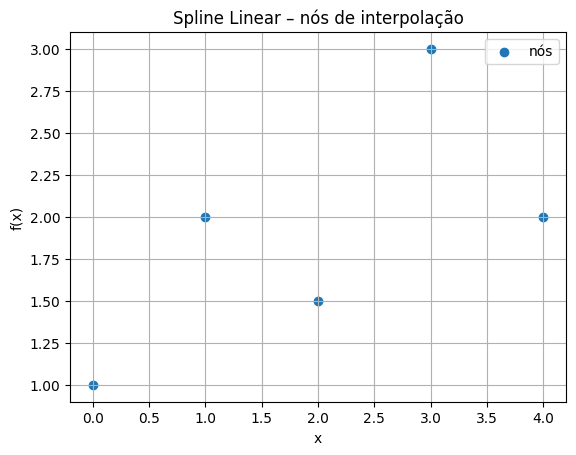

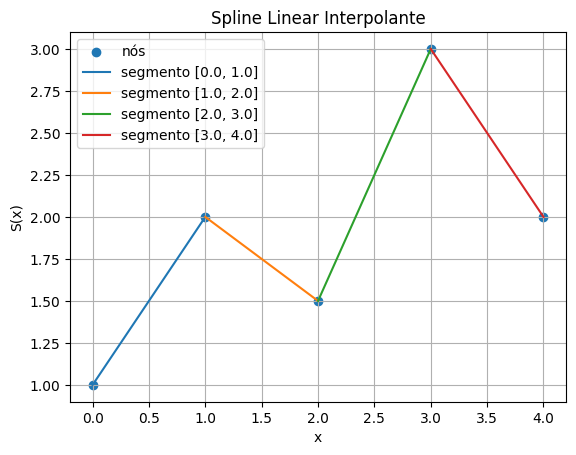

In [19]:
# nós e valores da função
xi = np.array([0, 1, 2, 3, 4], dtype=float)
fi = np.array([1, 2, 1.5, 3, 2], dtype=float)

# plot dos nós
plt.figure()
plt.scatter(xi, fi, marker='o', label='nós')
plt.title('Spline Linear – nós de interpolação')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# plot dos segmentos de spline linear
plt.figure()
plt.scatter(xi, fi, marker='o', label='nós')
for i in range(len(xi) - 1):
    x_segment = np.linspace(xi[i], xi[i+1], 100)
    h = xi[i+1] - xi[i]
    y_segment = ((xi[i+1] - x_segment) / h) * fi[i] + ((x_segment - xi[i]) / h) * fi[i+1]
    plt.plot(x_segment, y_segment, label=f'segmento [{xi[i]}, {xi[i+1]}]')
plt.title('Spline Linear Interpolante')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.grid(True)
plt.legend()
plt.show()

### 3. Spline cúbica natural

Usa polinômios de grau 3 em cada intervalo, impondo:

1. **Interpolação:**
   $S_i(x_i)=f(x_i)$, $S_i(x_{i+1})=f(x_{i+1})$.
2. **Suavidade:**
   $S_i'(x_{i+1})=S_{i+1}'(x_{i+1})$,
   $S_i''(x_{i+1})=S_{i+1}''(x_{i+1})$.
3. **Condições naturais:**
   $S''(x_0)=0$ e $S''(x_n)=0$.

Chamando $h_i=x_{i+1}-x_i$ e $\Delta y_i=f(x_{i+1})-f(x_i)$, montamos o sistema tridiagonal para os coeficientes $b_i=S_i''(x_i)$:

$$
\begin{bmatrix}
1 &        &        &   &   \\[-3pt]
h_0 & 2(h_0+h_1) & h_1 &   &   \\[-3pt]
    & \ddots & \ddots & \ddots &   \\[-3pt]
    &        & h_{n-1} & 2(h_{n-1}+h_n) & h_n \\[-3pt]
    &        &        &        & 1
\end{bmatrix}
\!
\begin{bmatrix}b_0\\b_1\\\vdots\\b_{n-1}\\b_n\end{bmatrix}
=
3
\begin{bmatrix}
0\\
\frac{\Delta y_1}{h_1}-\frac{\Delta y_0}{h_0}\\
\vdots\\
\frac{\Delta y_n}{h_n}-\frac{\Delta y_{n-1}}{h_{n-1}}\\
0
\end{bmatrix}.
$$

Após resolver $\mathbf A\,\mathbf b=\mathbf g$, os outros coeficientes em cada subintervalo são:

$$
\begin{aligned}
a_i &= \frac{b_i - b_{i-1}}{3\,h_i},\\
c_i &= \frac{\Delta y_{i-1}}{h_{i-1}}
        -\frac{h_{i-1}}{3}(2b_{i-1}+b_i),\\
d_i &= f(x_{i-1}).
\end{aligned}
$$

O polinômio em $[x_{i-1},x_i]$ é

$$
S_{i-1}(x)
= a_i\,(x - x_{i-1})^3
+ b_{i-1}\,(x - x_{i-1})^2
+ c_i\,(x - x_{i-1})
+ d_i.
$$

* **Algoritmo resumido:**

  1. Calcule todos os $h_i$ e $\Delta y_i$.
  2. Monte $A$ e $\mathbf g$.
  3. Resolva o sistema para $\mathbf b$.
  4. Calcule $a_i,c_i,d_i$.
  5. Para cada $\bar x$, identifique o subintervalo e avalie o polinômio correspondente.

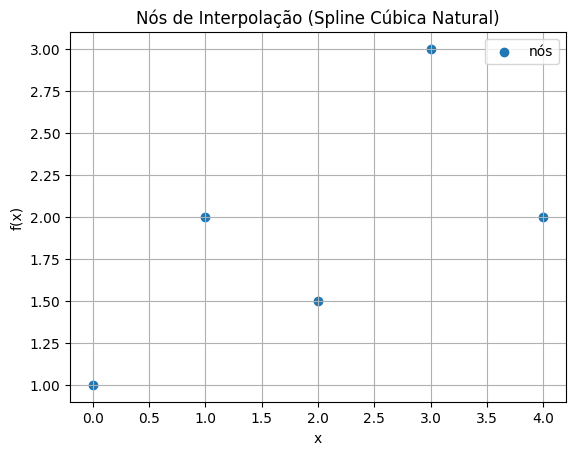

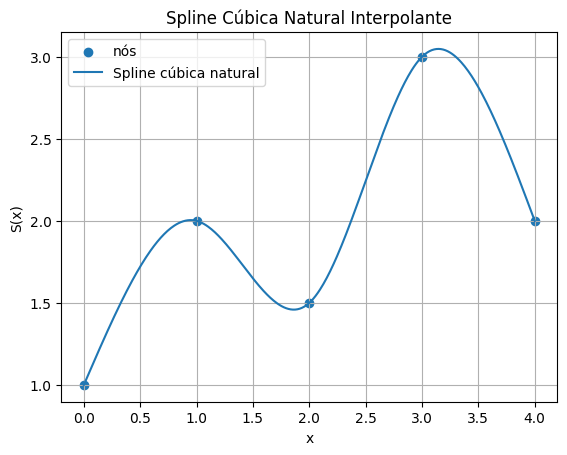

In [20]:
# defininfo os nós e valores da função
xi = np.array([0, 1, 2, 3, 4], dtype=float)
fi = np.array([1, 2, 1.5, 3, 2], dtype=float)

n = len(xi) - 1
h = xi[1:] - xi[:-1]
deltay = fi[1:] - fi[:-1]

# monta a matriz tridiagonal A e o vetor g
A = np.zeros((n+1, n+1))
g = np.zeros(n+1)
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    g[i] = 3 * (deltay[i] / h[i] - deltay[i-1] / h[i-1])

# resolve para obter b = S'' nos nós
b = np.linalg.solve(A, g)

# calcula coeficientes a_i, c_i, d_i em cada subintervalo
a = np.zeros(n+1)
c = np.zeros(n+1)
d = np.zeros(n+1)
for i in range(1, n+1):
    a[i] = (b[i] - b[i-1]) / (3 * h[i-1])
    c[i] = deltay[i-1] / h[i-1] - h[i-1] * (2*b[i-1] + b[i]) / 3
    d[i] = fi[i-1]

# função que avalia a spline natural em x
def S(x):
    idx = np.searchsorted(xi, x)
    if idx == 0:
        idx = 1
    elif idx > n:
        idx = n
    dx = x - xi[idx-1]
    return a[idx]*dx**3 + b[idx-1]*dx**2 + c[idx]*dx + d[idx]

# gera pontos para plotar a curva suave
xx = np.linspace(xi[0], xi[-1], 400)
yy = np.array([S(x) for x in xx])

# gráfico 1: scatter dos nós
plt.figure()
plt.scatter(xi, fi, marker='o', label='nós')
plt.title('Nós de Interpolação (Spline Cúbica Natural)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# gráfico 2: curva suave piecewise + nós
plt.figure()
plt.scatter(xi, fi, marker='o', label='nós')
plt.plot(xx, yy, label='Spline cúbica natural')
plt.title('Spline Cúbica Natural Interpolante')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.grid(True)
plt.legend()

plt.show()

### 4. Considerações finais

* **Spline linear** é simples, mas apenas contínua.
* **Spline cúbica natural** oferece suavidade até a segunda derivada e evita oscilações de alto grau.
* Ambas mantêm coesão com os métodos polinomiais anteriores, mas dividem o problema em pedaços, o que melhora estabilidade e flexibilidade.

# Questão 5: Mínimos Quadrados

Vamos supor que os casos acumulados de Covid-19, no período inicial da pandemia, de 26 de fevereiro de 2020 a 18 de junho de 2020 são dados em `casosacumuladosbrasilatualizada.txt`. O objetivo deste exercício é estudar o ajuste dos dados, no sentido dos **mínimos quadrados**, a uma função $g(z) = a b^z$, com $a, b \in \mathbb{R}$ e a função polinomial $P\_n(x) = a\_0 + a\_1x + a\_2x^2 + \dots + a\_nx^n$, para $n = 4, 5, 6$ com $a\_i \in \mathbb{R}$. Vamos utilizar os códigos implementados em aula:

In [ ]:
def mmq(x,y,k):
    X = np.vander(x,k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A,b)
    return a

def mmq_QR(x,y,k):
    X = np.vander(x,k)
    (Q,R) = np.linalg.qr(X)
    b = np.transpose(Q).dot(y)
    a = np.linalg.solve(R,b)
    return a

**a)** Explique cada um dos códigos dados acima. O que está sendo calculado?

**b)** Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função $g(z) = ab^z$, com $a, b \in \mathbb{R}$. Use um dos códigos dados acima.

**c)** Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função polinomial $P\_n(x) = a\_0 + a\_1x + a\_2x^2 + \dots + a\_nx^n$, para $n = 4, 5, 6$ com $a\_i \in \mathbb{R}$. Use um dos códigos dados acima.

**d)** Calcule o erro de truncamento dos itens b) e c) e compare os resultados.

**e)** Repita os itens b), c) e d) usando apenas os 20 primeiros dias.

**f)** Repita os itens b), c) e d) usando apenas os 50 últimos dias.

**g)** Compare os resultados obtidos. Que tipo de informação os dados nos fornecem?

## Mínimos Quadrados

**Antes de resolver a questão precisamos entender a teoria por trás.**

Depois de tantos métodos que interpõem exatamente os pontos, chegamos a um cenário comum em dados reais: **ruído** nos valores. Em vez de forçar um polinômio a passar por cada ponto, o que pode amplificar erros experimentais, buscamos uma curva que “melhor se aproxime” do conjunto. É aqui que entra o método de mínimos quadrados.

### 1. Objetivo e função-erro

Dados pontos $(x_i,f_i)$, $i=0,\dots,n$, escolhemos um modelo linear em parâmetros $\{a_j\}$, tipicamente um polinômio de grau $m$:

$$
p_m(x)=a_0 + a_1x + \dots + a_mx^m.
$$

Definimos a soma dos quadrados dos resíduos como

$$
E(a_0,\dots,a_m)
=\sum_{i=0}^n \bigl[f_i - p_m(x_i)\bigr]^2
=\sum_{i=0}^n \Bigl[f_i - (a_0 + a_1x_i + \dots + a_mx_i^m)\Bigr]^2.
$$

O método dos mínimos quadrados consiste em **minimizar** $E$ por variação nos coeficientes $\{a_j\}$.

### 2. Caso linear (reta)

Para $m=1$, $p_1(x)=ax+b$. As condições de mínimo vêm de

$$
\frac{\partial E}{\partial a}=0,
\quad
\frac{\partial E}{\partial b}=0,
$$

levando ao sistema

$$
\begin{cases}
a\sum x_i^2 \;+\; b\sum x_i = \sum x_i f_i,\\
a\sum x_i   \;+\; b(n+1)   = \sum f_i.
\end{cases}
$$

Isso garante a melhor reta no sentido de erro quadrático medio.

### 3. Formulação matricial

Defina

$$
A=\begin{bmatrix}
1 & x_0\\
1 & x_1\\
\vdots & \vdots\\
1 & x_n
\end{bmatrix},
\quad
\mathbf a=\begin{bmatrix}b\\a\end{bmatrix},
\quad
\mathbf f=\begin{bmatrix}f_0\\f_1\\\vdots\\f_n\end{bmatrix}.
$$

Procuramos $\mathbf a$ que minimize $\|A\,\mathbf a - \mathbf f\|_2^2$. As **equações normais** surgem ao multiplicar por $A^T$:

$$
A^T A\,\mathbf a = A^T\mathbf f.
$$

### 4. Exemplo prático

Pontos $(1,2),\,(2,3),\,(3,5)$.

1. Monte

   $$
   A=\begin{pmatrix}1&1\\1&2\\1&3\end{pmatrix},
   \quad
   \mathbf f=\begin{pmatrix}2\\3\\5\end{pmatrix}.
   $$
2. Calcule

   $$
   A^T A
   =\begin{pmatrix}3&6\\6&14\end{pmatrix},
   \quad
   A^T\mathbf f
   =\begin{pmatrix}10\\23\end{pmatrix}.
   $$
3. Resolva

   $$
   \begin{pmatrix}3&6\\6&14\end{pmatrix}
   \begin{pmatrix}b\\a\end{pmatrix}
   =\begin{pmatrix}10\\23\end{pmatrix}
   \;\Longrightarrow\;
   a=1.5,\;b=\tfrac13.
   $$
4. Reta ajustada

   $$
   \boxed{p_1(x)=1.5\,x + \tfrac13.}
   $$

### 5. Algoritmo (reta)

1. Entrada: vetores $x=(x_i)$ e $f=(f_i)$.
2. Construa $A$ com coluna de 1s e coluna de $x_i$.
3. Calcule $A^TA$ e $A^Tf$.
4. Resolva $A^TA\,\mathbf a = A^Tf$ (p.e. eliminação de Gauss).
5. Retorne $p_1(x)=a_1x+a_0$.

Para polinômios de grau $m$, basta ampliar $A$ com colunas $[x_i^2,\dots,x_i^m]$ e resolver de modo análogo.

### 6. Vantagens e aplicação

* **Robustez** em presença de ruído: não há sobreajuste a pontos fora de tendência.
* **Flexibilidade** para polinômios de grau arbitrário.
* **Interpretação estatística**: minimiza variância dos resíduos.


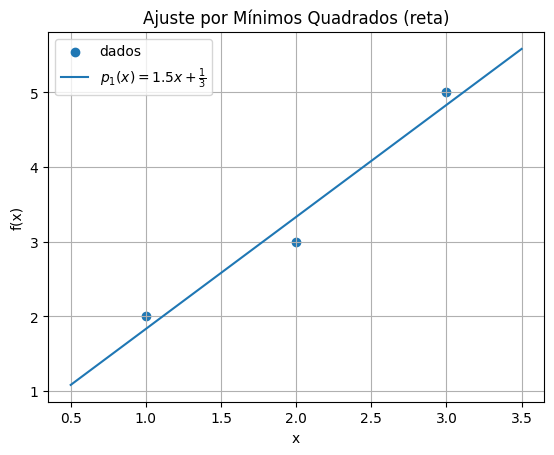

In [22]:
# dados do exemplo
xi = np.array([1, 2, 3], dtype=float)
fi = np.array([2, 3, 5], dtype=float)

# montagem da matriz A e cálculo dos coeficientes via equações normais
A = np.column_stack([np.ones_like(xi), xi])
ATA = A.T @ A
ATf = A.T @ fi
b, a = np.linalg.solve(ATA, ATf)  # b = intercepto, a = inclinação

# define a reta ajustada
def p1(x):
    return a * x + b

# pontos para plotar a reta suave
xx = np.linspace(xi.min() - 0.5, xi.max() + 0.5, 100)
yy = p1(xx)

# plota scatter e reta ajustada
plt.figure()
plt.scatter(xi, fi, marker='o', label='dados')
plt.plot(xx, yy, label=r'$p_1(x) = 1.5 x + \frac{1}{3}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Ajuste por Mínimos Quadrados (reta)')
plt.legend()
plt.grid(True)
plt.show()

## Ajustes por Mínimos Quadrados não Lineares (via transformações)

### Recapitulando o caso linear

Até agora vimos como, para $p_1(x)=ax+b$, aplicar mínimos quadrados leva às equações normais

$$
A^TA\begin{pmatrix}b\\a\end{pmatrix}=A^T\mathbf f,
$$

e obter a reta que minimiza $\sum (f_i - (ax_i+b))^2$. Mas e quando o modelo não é linear em $x$ ?

### Transformando problemas não lineares

Muita coisa pode ser “linearizada” por mudança de variáveis. O truque é escolher $\phi(x)$ e $Y$ de modo que

$$
\varphi(x;\theta)\approx Y\approx\text{modelo linear em parâmetros}.
$$

1. **Ajuste exponencial**

   $$
     \varphi(x)=ae^{bx}.
   $$

   Tomando $Y=\ln y$ e $X=x$, obtemos

   $$
     Y = \ln(a)+b\,X = a_0 + a_1X,
     \quad
     a_0=\ln(a),\;a_1=b.
   $$

2. **Ajuste hiperbólico**

   $$
     \varphi(x)=\frac1{\alpha_0+\alpha_1x}.
   $$

   Tomando $Y=1/y$, fica

   $$
     Y = \alpha_0 + \alpha_1x.
   $$

3. **Ajuste potencial**

   $$
     \varphi(x)=a\,x^b.
   $$

   Tomando $Y=\ln y$ e $W=\ln x$, fica

   $$
     Y=\ln(a)+b\,W = a_0 + a_1W.
   $$

Em cada caso, montamos a matriz $A$ e o vetor de “saída” $\mathbf Y$, aplicamos mínimos quadrados lineares e depois retransformamos os parâmetros.


### Exemplo: Ajuste exponencial

Pontos experimentais:

|  $x$ | $y=f(x)$ |
| :--: | :------: |
|  –1  |   6.07   |
| –0.9 |   5.49   |
| –0.8 |   4.96   |
|   0  |   2.01   |
|   1  |   0.68   |
|   2  |   0.23   |

1. **Transformação**:

   $$
     X = x,\quad Y = \ln(y).
   $$

   Calculamos $Y$ em cada ponto.

2. **Matriz e vetor**:

   $$
     A=\begin{pmatrix}
       1 & X_0\\
       1 & X_1\\
       \vdots&\vdots\\
       1 & X_5
     \end{pmatrix},\quad
     \mathbf Y=\begin{pmatrix}Y_0\\Y_1\\\vdots\\Y_5\end{pmatrix}.
   $$

3. **Equações normais**:

   $$
     A^TA \begin{pmatrix}a_0\\a_1\end{pmatrix}
     = A^T\mathbf Y.
   $$

4. **Cálculo direto** (valores numéricos):

   $$
   \sum X_i = 0.3,\quad \sum X_i^2 = 7.45,
   \quad \sum Y_i = 8.1164,\quad \sum X_iY_i = 3.7532,\quad m=6.
   $$

   $$
     a_0
     = \frac{(7.45)(8.1164)- (0.3)(3.7532)}{6\cdot7.45 - (0.3)^2}
     \approx 0.6814,
   $$

   $$
     a_1
     = \frac{6\cdot3.7532 - (0.3)\,8.1164}{6\cdot7.45 - (0.3)^2}
     \approx -1.1169.
   $$

5. **Retransformação**:

   $$
     a = e^{a_0}\approx e^{0.6814}\approx1.9766,
     \quad b=a_1\approx -1.1169.
   $$

6. **Função ajustada**:

   $$
     \boxed{\varphi(x)=1.9766\,e^{-1.1169\,x}.}
   $$

### Algoritmo resumido

1. Escolha a **transformação** que lineariza o modelo: defina $(X,Y)$.
2. Monte a matriz $A$ (coluna de 1’s e colunas das variáveis transformadas).
3. Calcule $A^TA$ e $A^T\mathbf Y$.
4. Resolva $A^TA\,\mathbf a = A^T\mathbf Y$.
5. Retorne o ajuste em termos de $\varphi(x)$, invertendo a transformação.

### Considerações finais

* Transformações reduzem muitos ajustes não lineares a um problema linear de mínimos quadrados.
* A escolha certa de $(X,Y)$ depende do tipo de curva que se espera nos dados.
* Depois de ajustar, sempre verificamos o **resíduo** e o **gráfico** dos dados originais contra a curva ajustada para garantir qualidade de ajuste.
